# Análisis estadístico de dos ETFs: SPY y TLT 

Notebook soporte del artículo:Una cartera equilibrada- Comportamiento renta fija con renta variable https://estrategiastrading.com/equilibrio-renta-fija-con-renta-variable/


In [4]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web


import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']= 16,8
plt.style.use('seaborn-darkgrid')

In [5]:
# Cargar datos
start = pd.Timestamp ('2002-08-01')
end = pd.Timestamp ('2017-1-01')

symbols = ['SPY', 'TLT']
ETFs = pd.DataFrame()
for sym in symbols:
    ETFs[sym] = web.DataReader(sym,'yahoo' ,start,end)['Adj Close']   
    

## Gráficos

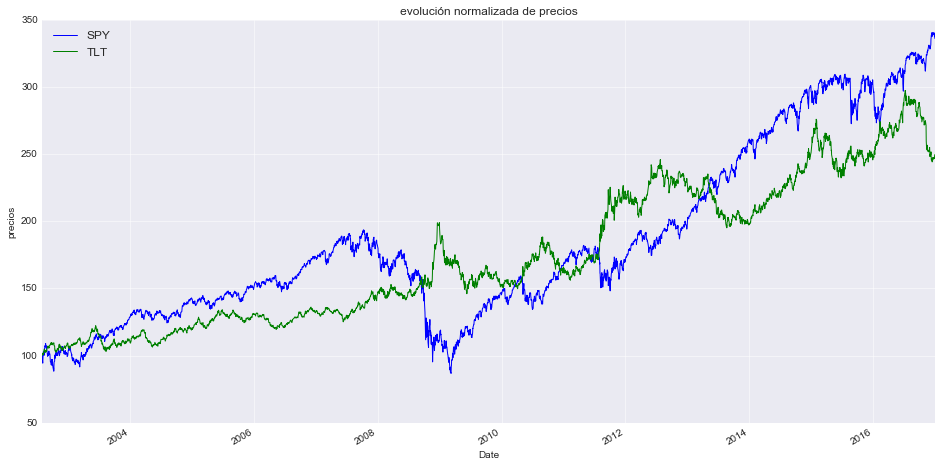

In [6]:
#Grafico normalizando el valor inicial en 100
ax= (ETFs / ETFs.ix[0] * 100).plot()

plt.title ('evolución normalizada de precios')
plt.ylabel('precios')
plt.legend(['SPY','TLT'], loc = 0);


Se ve un claro movimiento tendencial

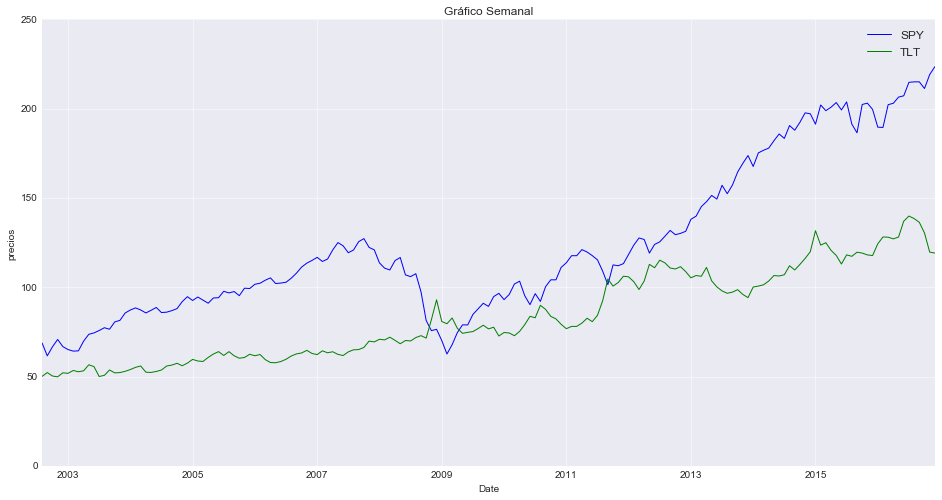

In [8]:
# Cambio a mensual
ETFxMes = ETFs.resample ('BM').last()
#grafico no normalizado
ax= ETFxMes.plot()
plt.title ('Gráfico Semanal')
plt.ylabel('precios')
plt.legend(['SPY','TLT'], loc = 0);

## Rendimientos mensuales

In [9]:
log_returns = np.log(ETFxMes) - np.log(ETFxMes.shift(1))
log_returns = log_returns.dropna()
log_returns.describe()

,SPY,TLT
count,172.000000,172.000000
mean,0.006852,0.005038
std,0.041247,0.038421
min,-0.180547,-0.140076
25%,-0.014101,-0.018805
50%,0.012156,0.006749
75%,0.031281,0.026680
max,0.103591,0.134018


In [10]:
RPos = (log_returns >= 0). sum()# cuantos retornos son mayores a 0
RPos

SPY    112
TLT     93
dtype: int64

In [11]:
RNeg = (log_returns < 0). sum()# Cuantos meses son negativos
RNeg

SPY    60
TLT    79
dtype: int64

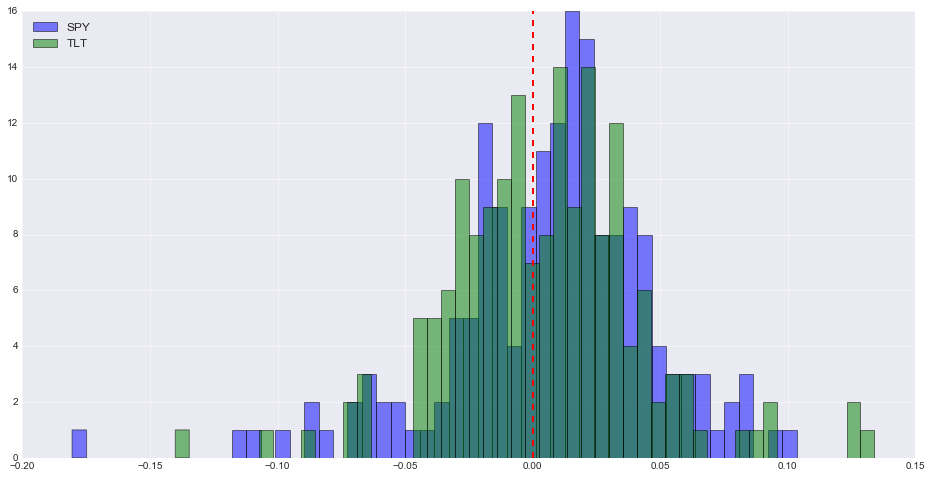

In [12]:
log_returns.SPY.hist(bins=50,alpha=0.5, label = 'SPY')
log_returns.TLT.hist(bins=50, alpha=0.5, label = 'TLT')
plt.legend(loc='upper left')
plt.ylim([0, 16])
plt.axvline(x=0, color='r', linestyle='dashed', linewidth=2);

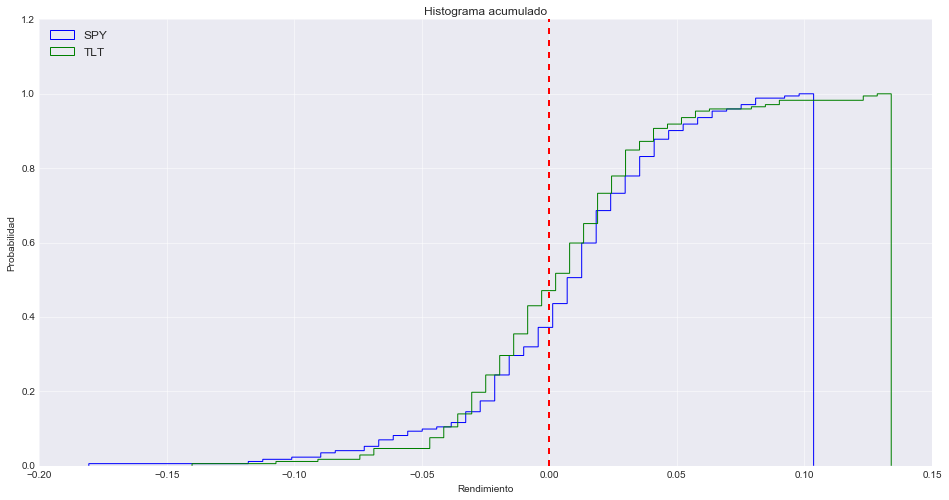

In [13]:
fig, ax = plt.subplots()
ax.hist(log_returns.SPY, bins=50,histtype='step', cumulative= 1, normed=1,label= 'SPY')
ax.hist(log_returns.TLT, bins=50, histtype='step', cumulative= 1,normed=1, label= 'TLT')
ax.set_title('Histograma acumulado')
ax.set_xlabel('Rendimiento')
ax.set_ylabel('Probabilidad')
plt.legend(loc='upper left')
plt.axvline(x=0, color='r', linestyle='dashed', linewidth=2);

# Correlaciones

In [14]:
#correlación
log_returns.corr()

,SPY,TLT
SPY,1.000000,-0.292953
TLT,-0.292953,1.000000


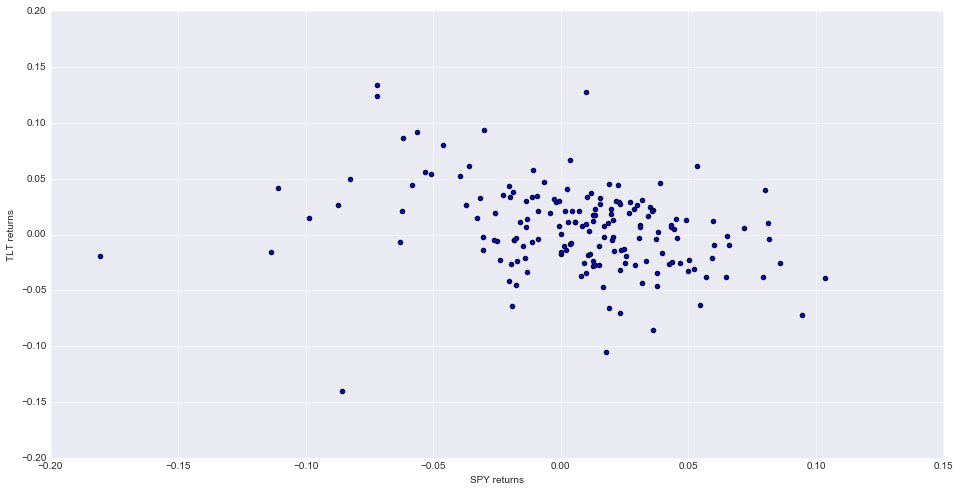

In [15]:
plt.scatter(log_returns['SPY'],log_returns['TLT'])
plt.xlabel('SPY returns')
plt.ylabel('TLT returns');


## Rolling correlation

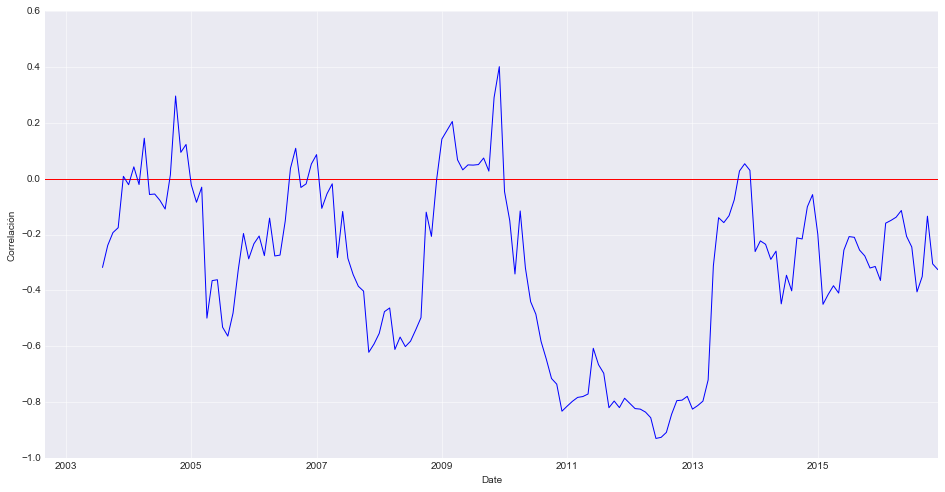

In [16]:
ax = log_returns.SPY.rolling(12).corr(log_returns.TLT).plot()
plt.hlines(0,start,end, color= 'r')
plt.ylabel('Correlación');

### ¿Cuántos meses se da cada tipo de situación?

In [17]:
print('Nº meses TLT >= 0 y SPY >= 0 es igual a ' + str (len(log_returns[(log_returns.TLT >= 0) & (log_returns.SPY >= 0)])))
print('Nº meses TLT < 0 y SPY < 0 es igual a ' + str (len(log_returns[(log_returns.TLT < 0) & (log_returns.SPY < 0)])))
print('Nº meses TLT >= 0 y SPY < 0 es igual a ' + str (len(log_returns[(log_returns.TLT >= 0) & (log_returns.SPY < 0)])))
print('Nº meses TLT < 0 y SPY >= 0 es igual a ' + str (len(log_returns[(log_returns.TLT < 0) & (log_returns.SPY >= 0)])))

Nº meses TLT >= 0 y SPY >= 0 es igual a 55
Nº meses TLT < 0 y SPY < 0 es igual a 22
Nº meses TLT >= 0 y SPY < 0 es igual a 38
Nº meses TLT < 0 y SPY >= 0 es igual a 57


### ¿Cómo se comporta una serie cuando la otra gana o pierde dinero?

In [18]:
TLTcuandoSPYNegativo = log_returns[log_returns.SPY < 0 ]
TLTcuandoSPYPositivo = log_returns[log_returns.SPY >= 0 ]

SPYcuandoTLTNegativo = log_returns[log_returns.TLT < 0 ]
SPYcuandoTLTPositivo = log_returns[log_returns.TLT >= 0 ]

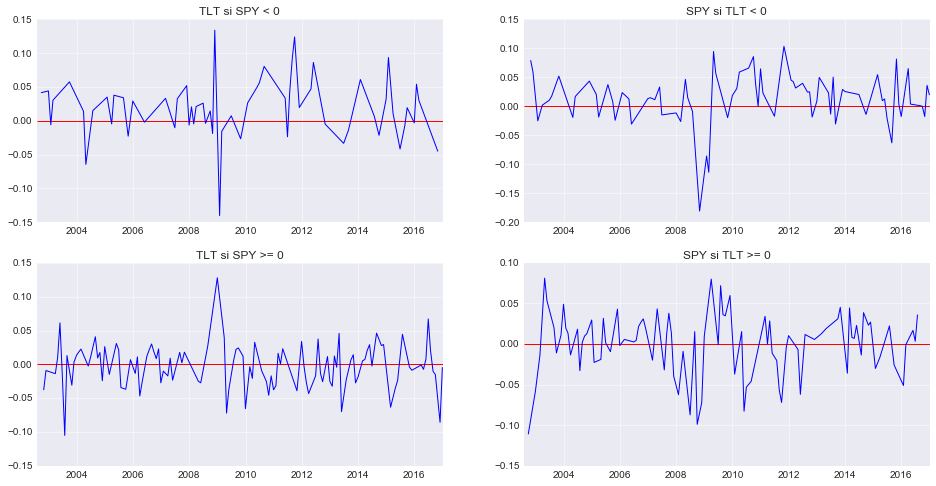

In [19]:
#Plots
fig, axes = plt.subplots(nrows=2, ncols = 2)

axes[0,0].plot(TLTcuandoSPYNegativo.TLT)
axes[0,0].hlines(0,start,end, color= 'r')
axes[0,0].set_title('TLT si SPY < 0')

axes[1,0].plot(TLTcuandoSPYPositivo.TLT)
axes[1,0].set_title('TLT si SPY >= 0')
axes[1,0].hlines(0,start,end, color= 'r')

axes[0,1].plot(SPYcuandoTLTNegativo.SPY)
axes[0,1].hlines(0,start,end, color= 'r')
axes[0,1].set_title('SPY si TLT < 0')

axes[1,1].plot(SPYcuandoTLTPositivo.SPY)
axes[1,1].set_title('SPY si TLT >= 0')
axes[1,1].hlines(0,start,end, color= 'r');


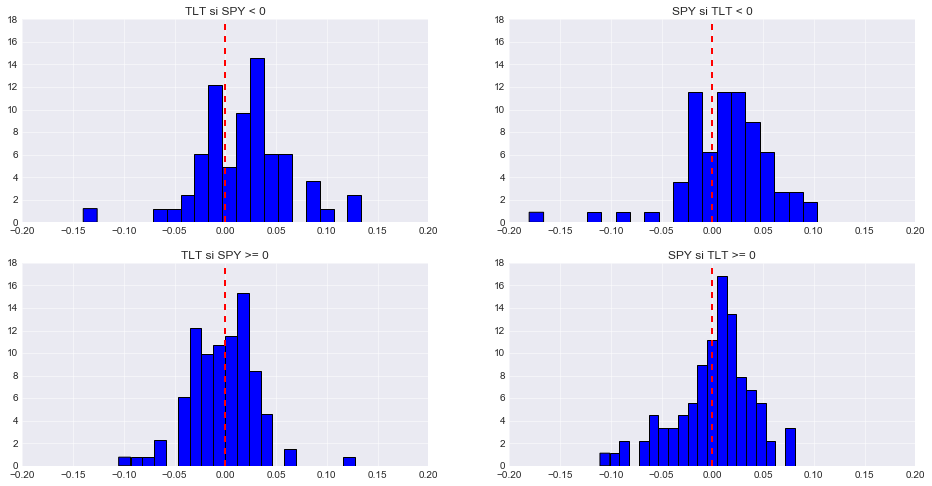

In [20]:
#Formato histograma
fig = plt.figure()


img1= fig.add_subplot(221)
plt.hist(TLTcuandoSPYNegativo.TLT, bins=20, normed=True)
plt.title('TLT si SPY < 0')
plt.axvline(x=0, color='r', linestyle='dashed', linewidth=2)
plt.ylim([0, 18])
plt.xlim([-0.20, 0.20])


img2 = fig.add_subplot(223)
plt.hist(TLTcuandoSPYPositivo.TLT, bins=20, normed=True)
plt.title('TLT si SPY >= 0')
plt.axvline(x=0, color='r', linestyle='dashed', linewidth=2)
plt.ylim([0, 18])
plt.xlim([-0.20, 0.20])

img3= fig.add_subplot(222)
plt.hist(SPYcuandoTLTNegativo.SPY, bins=20, normed=True)
plt.title('SPY si TLT < 0')
plt.axvline(x=0, color='r', linestyle='dashed', linewidth=2)
plt.ylim([0, 18])
plt.xlim([-0.20, 0.20])

img4 = fig.add_subplot(224)
plt.hist(SPYcuandoTLTPositivo.SPY, bins=20, normed=True)
plt.title('SPY si TLT >= 0')
plt.axvline(x=0, color='r', linestyle='dashed', linewidth=2)
plt.ylim([0, 18])
plt.xlim([-0.20, 0.20]);


### ¿Cuánto gana TLT cuando SPY pierde?

In [21]:
(log_returns[(log_returns.TLT >=0) & (log_returns.SPY < 0)]).describe()

,SPY,TLT
count,38.000000,38.000000
mean,-0.035296,0.043431
std,0.029528,0.030253
min,-0.110767,0.006620
25%,-0.055690,0.022420
50%,-0.027962,0.033915
75%,-0.011792,0.053707
max,-0.000655,0.134018


In [22]:
(log_returns[(log_returns.TLT >=0) &(log_returns.SPY < 0)]).sum()

SPY   -1.341248
TLT    1.650387
dtype: float64

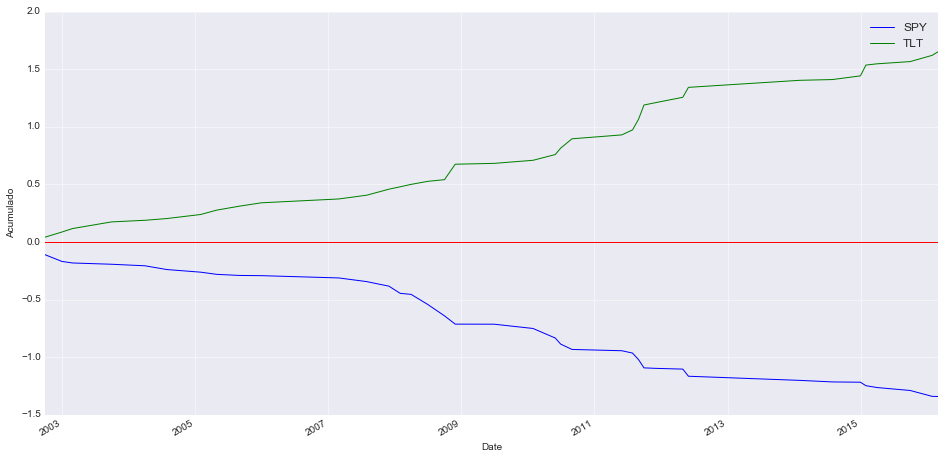

In [23]:
Bonossibolsapierde=((log_returns[(log_returns.TLT >= 0) & (log_returns.SPY < 0)])).cumsum()
Bonossibolsapierde.plot()
plt.hlines(0,start,end, color= 'r')
plt.ylabel('Acumulado');

### ¿Y SPY cuando TLT pierde?

In [25]:
(log_returns[(log_returns.SPY >=0) & (log_returns.TLT < 0)]).describe()

,SPY,TLT
count,57.000000,57.000000
mean,0.033681,-0.027064
std,0.025199,0.021477
min,0.000000,-0.105147
25%,0.014928,-0.034852
50%,0.025596,-0.024249
75%,0.049923,-0.013277
max,0.103591,-0.000934


In [26]:
(log_returns[(log_returns.SPY >=0) &(log_returns.TLT < 0)]).sum()

SPY    1.919808
TLT   -1.542626
dtype: float64

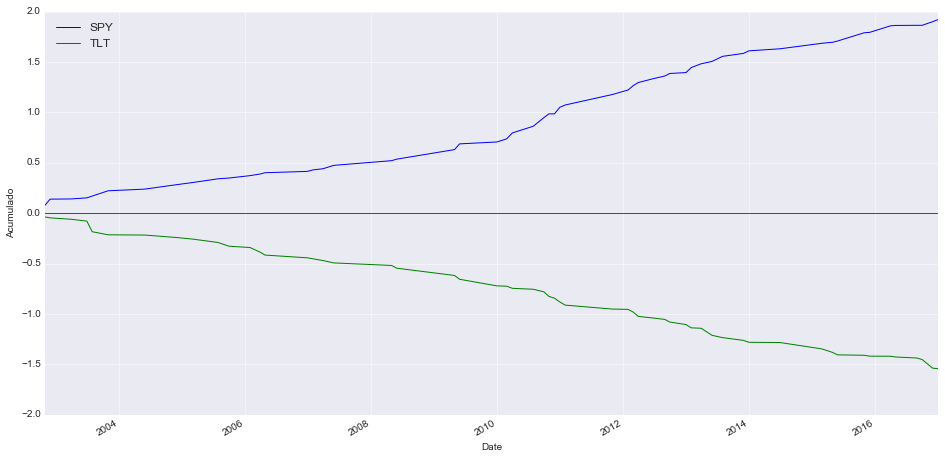

In [27]:
Bolsasibonospierde=((log_returns[(log_returns.SPY >= 0) & (log_returns.TLT < 0)])).cumsum()
Bolsasibonospierde.plot()
plt.hlines(0,start,end, color= 'r')
plt.ylabel('Acumulado');

Fuentes e inspiración: http://www.blackarbs.com/blog/exploring-the-relationship-between-spy-and-tlt/4/22/2016